In [3]:
import pandas as pd

df = pd.read_csv("./accomodation_info.csv", index_col=0, parse_dates=[0])

In [5]:
df.head()

,顧客ID,宿泊者名,プラン,金額
日時,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000


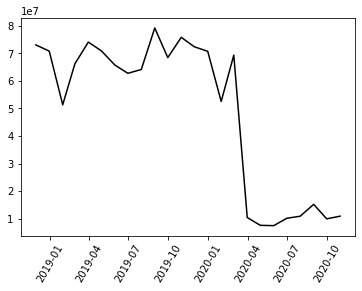

In [7]:
import matplotlib.pyplot as plt

# 月ごとの売上と利用者数
plt.plot(df["金額"].resample('M').sum(), color="k")
plt.xticks(rotation=60)
plt.show()

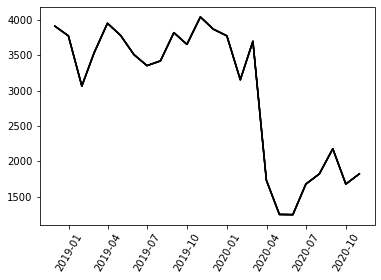

In [8]:
# 月ごとの利用者数
plt.plot(df.resample('M').count(), color="k")
plt.xticks(rotation=60)
plt.show()

2020/03から売上・利用者数が激減している

# どの様な利用者がいるのか

各利用者の利用回数の
* 平均値
* 中央地
* 最小値
* 最大値
を調べる

In [13]:
costomer_count = df['顧客ID'].value_counts()

x_mean = costomer_count.mean()
x_median = costomer_count.median()
x_min = costomer_count.min()
x_max = costomer_count.max()

print("平均値: {}".format(x_mean))
print("中央値: {}".format(x_median))
print("最小値: {}".format(x_min))
print("最大値: {}".format(x_max))

平均値: 13.073641997812613
中央値: 7.0
最小値: 1
最大値: 184


In [14]:
print("利用者: {}".format(costomer_count))

利用者: 110067    184
110043    153
110069    150
110159    125
110149    117
         ... 
112711      1
114109      1
114760      1
112682      1
114163      1
Name: 顧客ID, Length: 5486, dtype: int64


最小値が`1`、最大値が`184`で平均が`13`なので、最大値は平均から遠い位置にいる。  
この場合は最小値付近に利用回数が集中していて、最大値に近いものはまばらに点在するという状況が予想できる。

# 分布

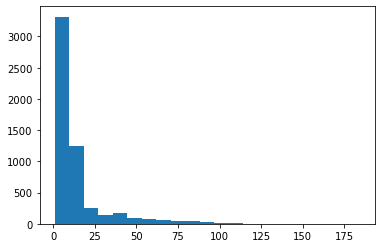

In [21]:
import matplotlib.pyplot as plt

x = df["顧客ID"].value_counts()

x_hist, t_hist, _ = plt.hist(x, bins=21)
plt.show()

0付近にデータが集中しているので、ほとんどの客は一回から複数回の利用のみ。少数の客だけ極めて利用回数が高い。

0付近に多くのサンプルが集中し、それ以降は急激に減少する分布は「べき分布」と呼び  
「売上の8割は2割の顧客が生み出す」などの法則を裏付ける分布。